In [8]:
import pandas as pd
cs_df = pd.read_csv('kc_house_data.csv')
cs_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
cs_df.size

453873

In [10]:
cs_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# Handling missing values
cs_df.dropna(inplace = True)
cs_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#list of all numeric data
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = cs_df.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

ValueError: A given column is not a column of the dataframe

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the dataset (assuming it's in CSV format)
# Replace 'file_path' with the path to your dataset
file_path = 'kc_house_data.csv'
data = pd.read_csv(file_path)

# Define features and target variable
features = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']
target = 'price'



In [18]:

# Separate features and target variable
X = data[features]
y = data[target]


In [19]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorical_features = ['zipcode']


In [20]:

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [21]:
# Append regression model to preprocessing pipeline
regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

# Fit the model
regression_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zipcode'])])),
                ('regressor', LinearRegression())])

In [22]:
# Predict on the testing set
predictions = regression_model.predict(X_test)

In [23]:

# Calculate the Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 38818194073.91477


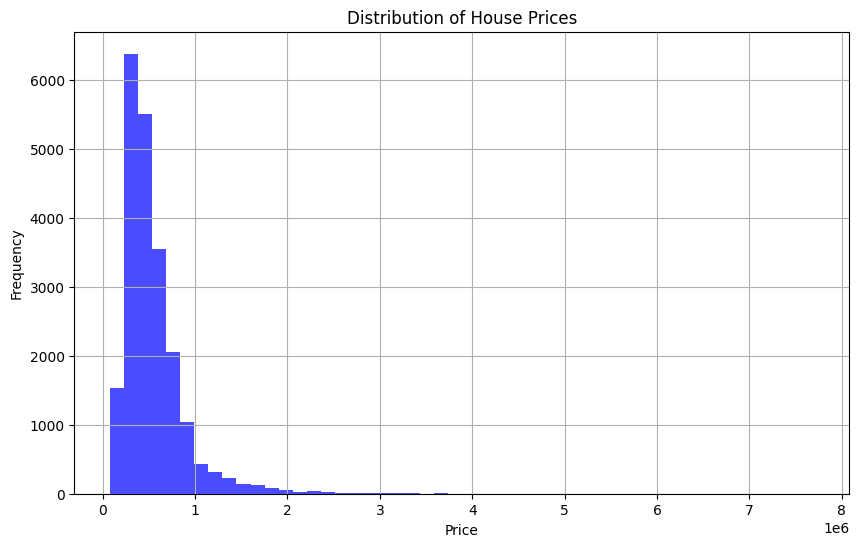

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of House Prices
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True)
plt.show()


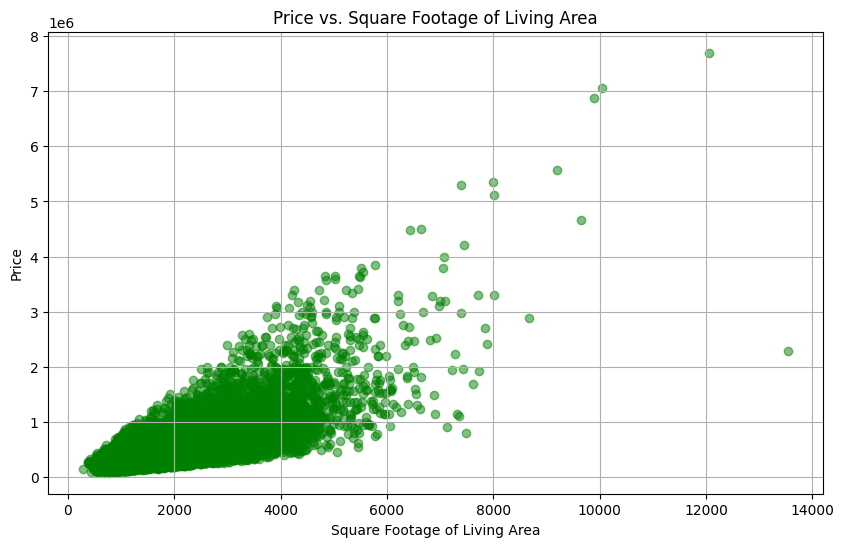

In [25]:

# Scatter Plot: Square Footage of Living Area vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(data['sqft_living'], data['price'], color='green', alpha=0.5)
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Living Area')
plt.grid(True)
plt.show()



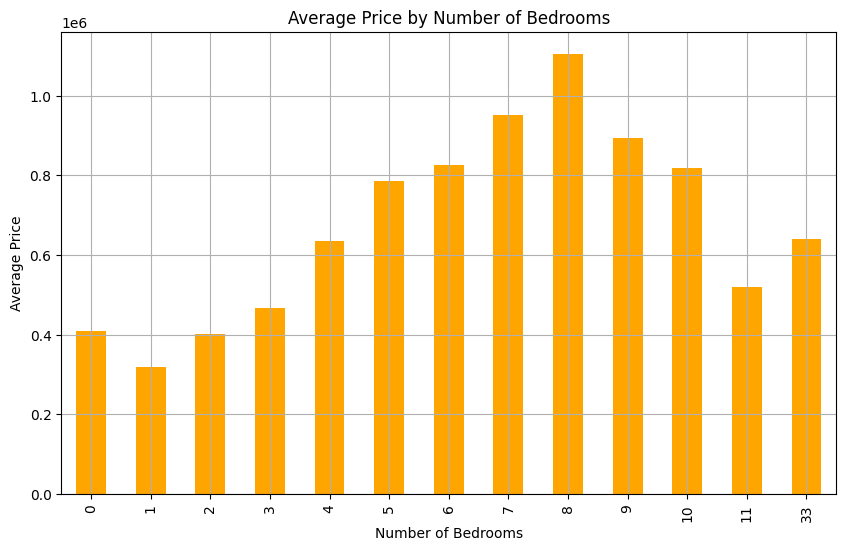

In [26]:

# Bar Plot: Number of Bedrooms vs. Average Price
avg_price_bedrooms = data.groupby('bedrooms')['price'].mean()
plt.figure(figsize=(10, 6))
avg_price_bedrooms.plot(kind='bar', color='orange')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.grid(True)
plt.show()

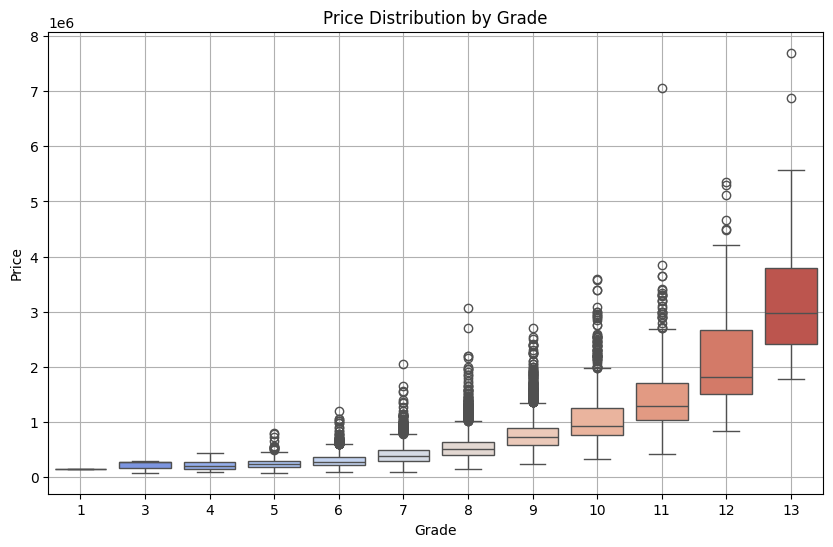

In [27]:


# Box Plot: Grade vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=data, palette='coolwarm')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Price Distribution by Grade')
plt.grid(True)
plt.show()


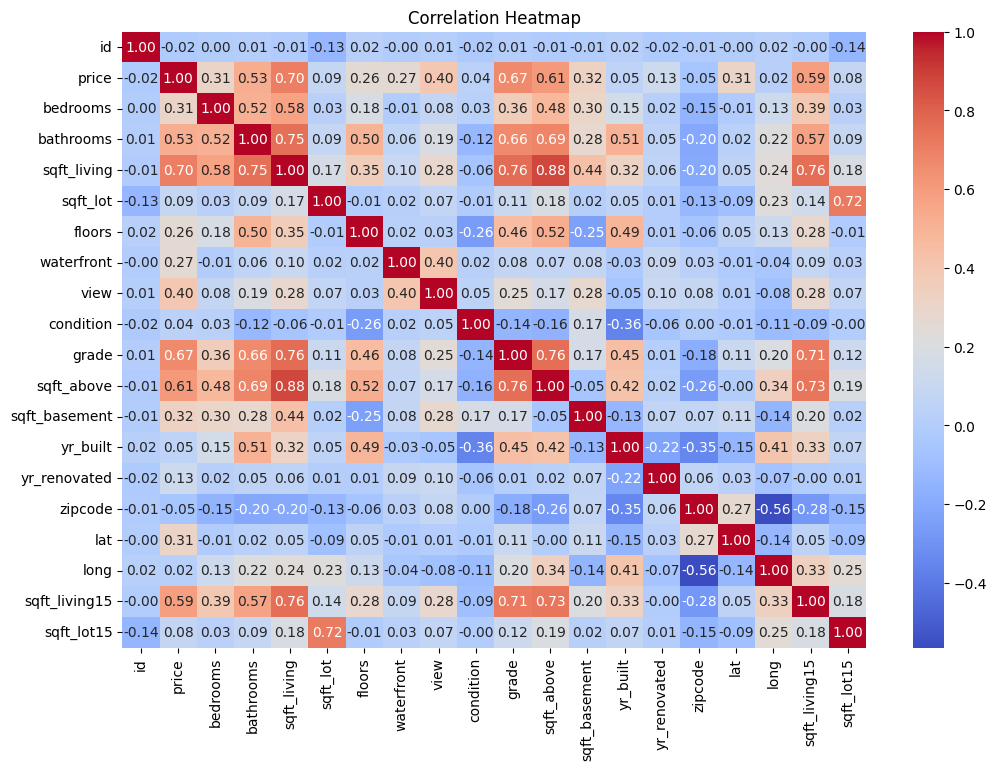

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns from the dataset
numeric_data = data.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [29]:
import seaborn as sns

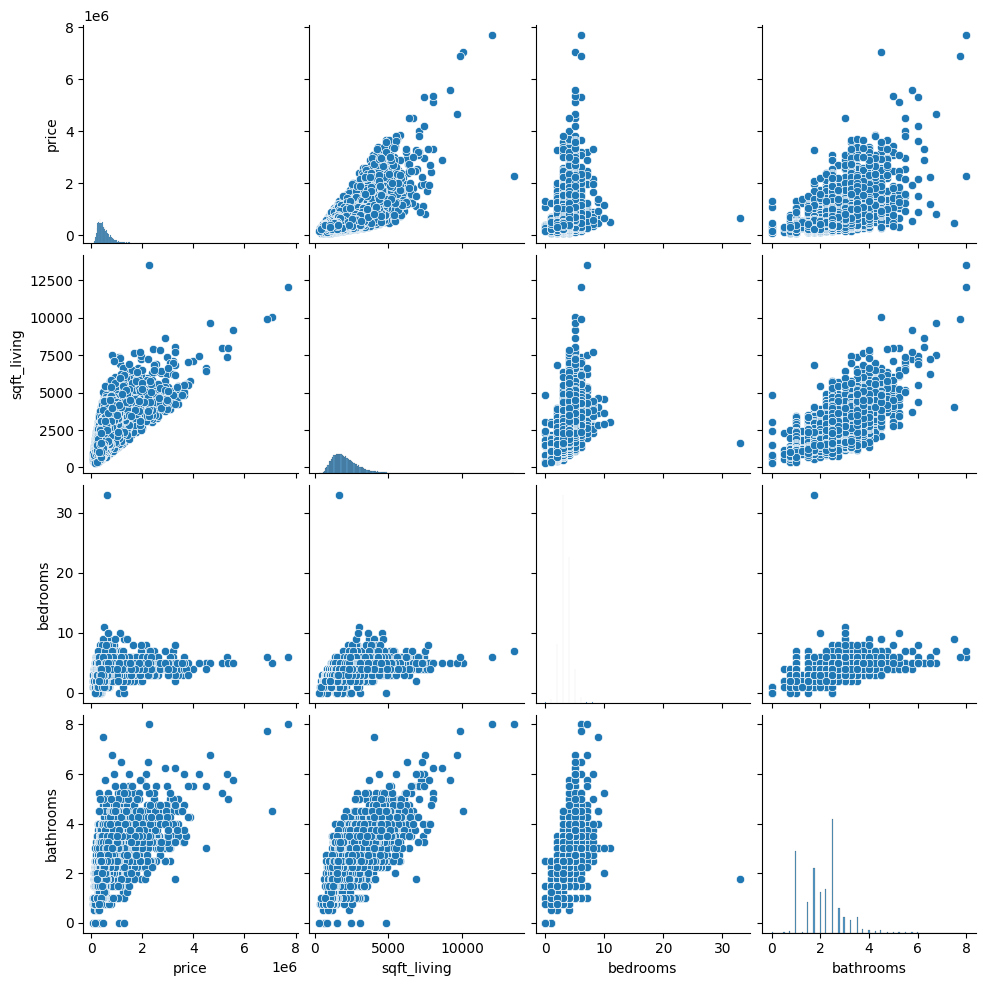

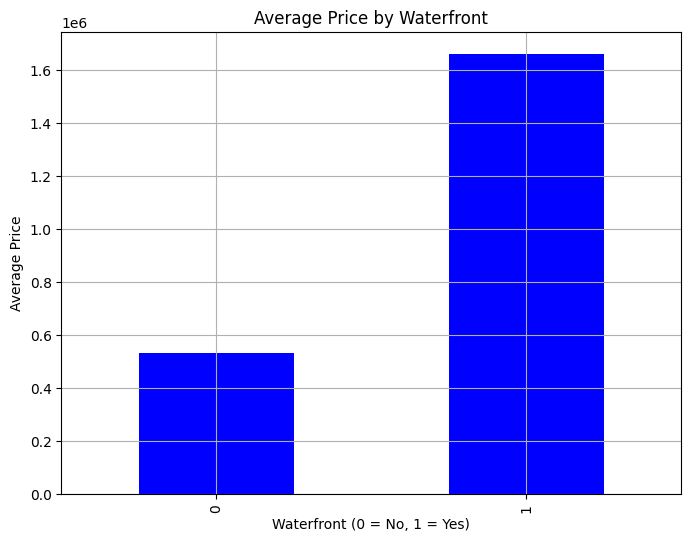

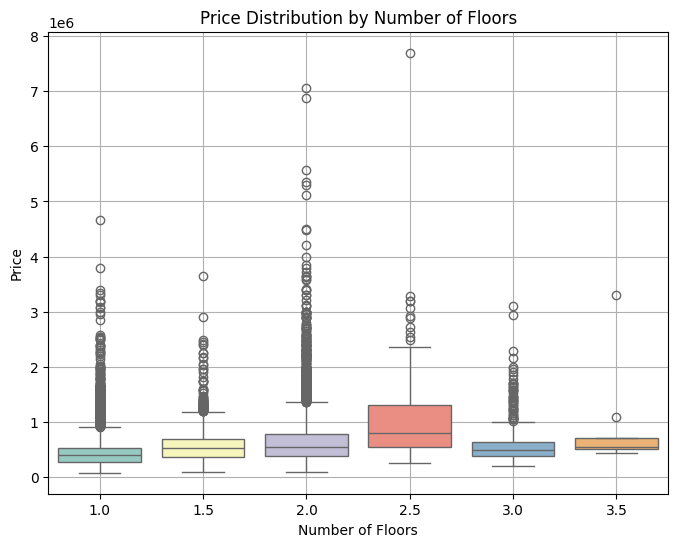

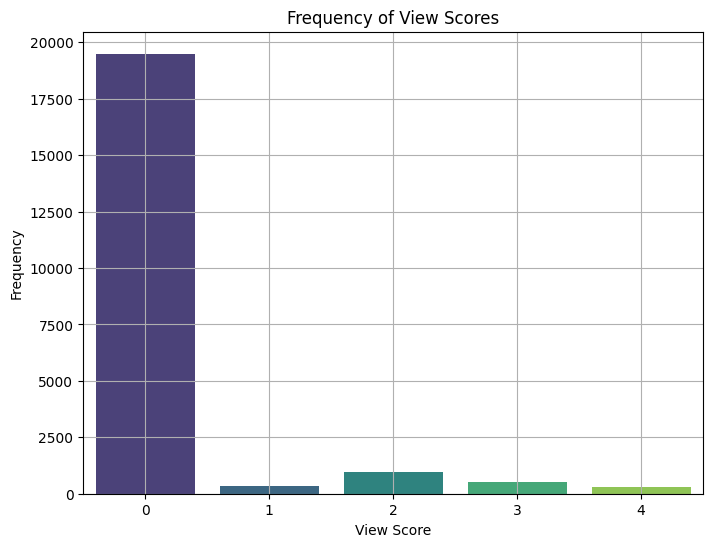

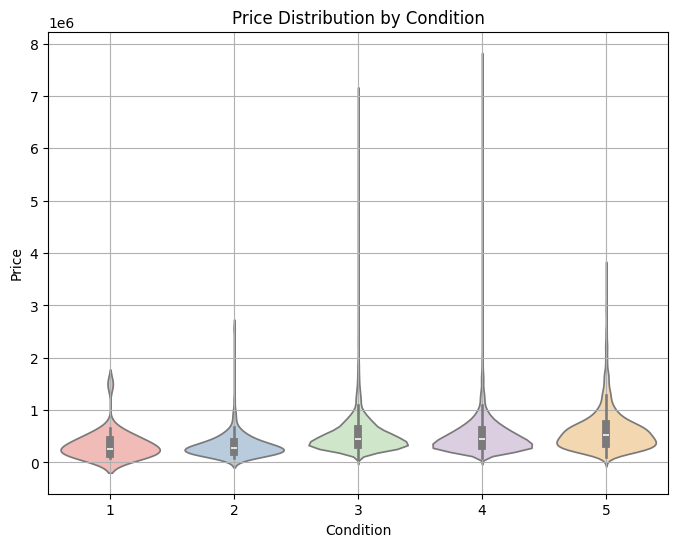

In [33]:
import seaborn as sns

# Pairplot
sns.pairplot(data[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.show()

# Bar Plot: Waterfront vs. Average Price
avg_price_waterfront = data.groupby('waterfront')['price'].mean()
plt.figure(figsize=(8, 6))
avg_price_waterfront.plot(kind='bar', color='blue')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.title('Average Price by Waterfront')
plt.grid(True)
plt.show()

# Box Plot: Number of Floors vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='floors', y='price', data=data, palette='Set3')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Floors')
plt.grid(True)
plt.show()

# Count Plot: View vs. Frequency
plt.figure(figsize=(8, 6))
sns.countplot(x='view', data=data, palette='viridis')
plt.xlabel('View Score')
plt.ylabel('Frequency')
plt.title('Frequency of View Scores')
plt.grid(True)
plt.show()

# Violin Plot: Condition vs. Price
plt.figure(figsize=(8, 6))
sns.violinplot(x='condition', y='price', data=data, palette='Pastel1')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price Distribution by Condition')
plt.grid(True)
plt.show()


In [34]:
pip install plotly


In [35]:
import plotly.express as px

# Scatter Plot: Square Footage of Living Area vs. Price
scatter_fig = px.scatter(data, x='sqft_living', y='price', title='Price vs. Square Footage of Living Area')
scatter_fig.show()

# Bar Plot: Waterfront vs. Average Price
avg_price_waterfront = data.groupby('waterfront')['price'].mean().reset_index()
bar_fig = px.bar(avg_price_waterfront, x='waterfront', y='price', labels={'waterfront': 'Waterfront', 'price': 'Average Price'},
                 title='Average Price by Waterfront')
bar_fig.show()

# Box Plot: Number of Floors vs. Price
box_fig = px.box(data, x='floors', y='price', title='Price Distribution by Number of Floors')
box_fig.show()

# Count Plot: View vs. Frequency
count_fig = px.histogram(data, x='view', title='Frequency of View Scores')
count_fig.show()

# Violin Plot: Condition vs. Price
violin_fig = px.violin(data, x='condition', y='price', title='Price Distribution by Condition', box=True)
violin_fig.show()


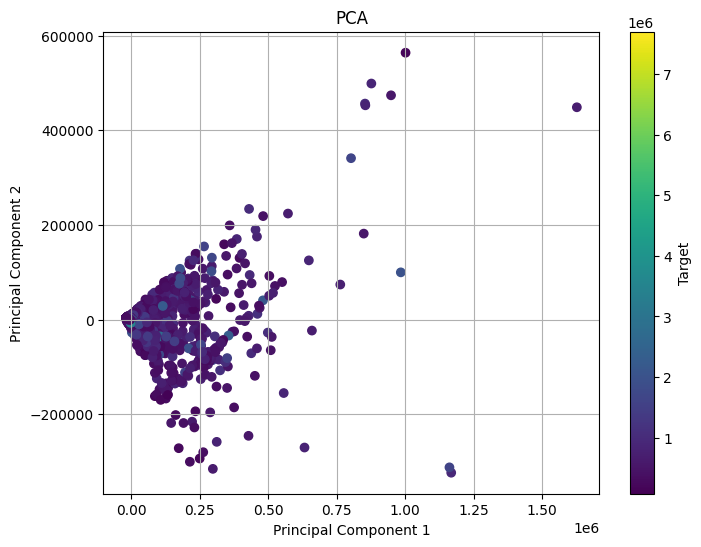

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


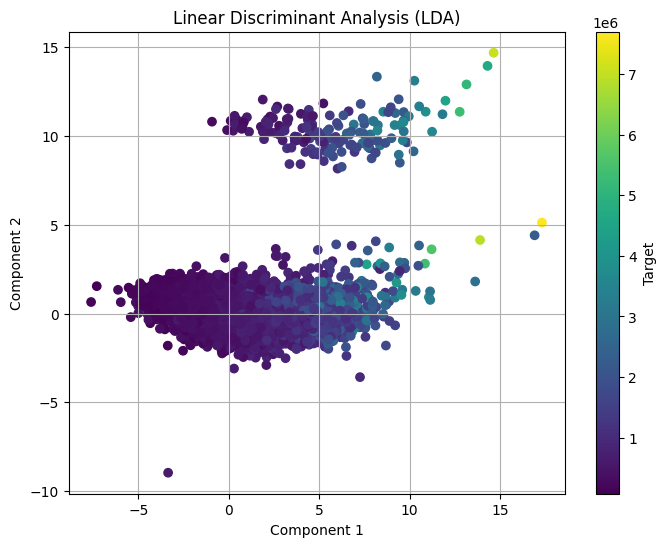

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


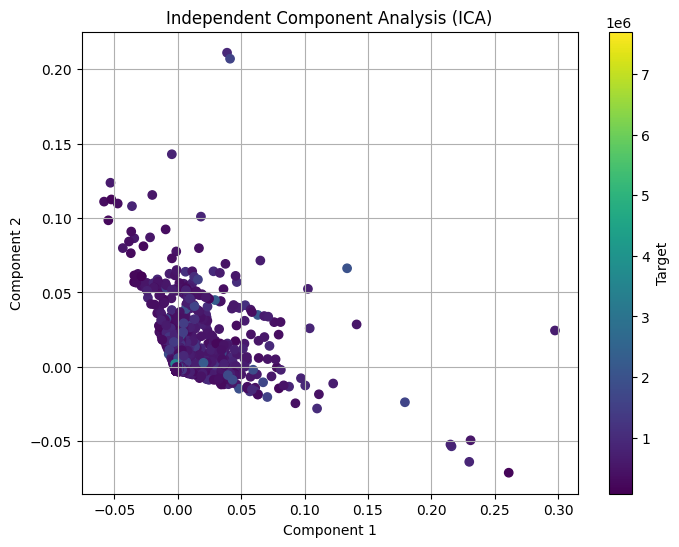

In [39]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis')
plt.title('Independent Component Analysis (ICA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Assuming 'data' is your original dataset

# Select numerical features for scaling
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

# Create a copy of the dataset with only numerical features
numerical_data = data[numerical_features].copy()

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(numerical_data)
# Convert the scaled array back to a DataFrame
data_min_max_scaled = pd.DataFrame(data_min_max_scaled, columns=numerical_features)

# 2. Standardization (Z-score normalization)
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(numerical_data)
# Convert the scaled array back to a DataFrame
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=numerical_features)

# 3. Transformation (Logarithmic Transformation)
data_log_transformed = np.log1p(numerical_data)  # log(x + 1) to handle zero values
# Convert the transformed array back to a DataFrame
data_log_transformed = pd.DataFrame(data_log_transformed, columns=numerical_features)

# 4. Transformation (Power Transformation)
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')
data_power_transformed = power_transformer.fit_transform(numerical_data)
# Convert the transformed array back to a DataFrame
data_power_transformed = pd.DataFrame(data_power_transformed, columns=numerical_features)

# Print summary statistics for the scaled and transformed data
print("Min-Max Scaled Data Summary Statistics:")
print(data_min_max_scaled.describe())
print("\nStandard Scaled Data Summary Statistics:")
print(data_standard_scaled.describe())
print("\nLog Transformed Data Summary Statistics:")
print(data_log_transformed.describe())
print("\nPower Transformed Data Summary Statistics:")
print(data_power_transformed.describe())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Min-Max Scaled Data Summary Statistics:
           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.102147      0.264345      0.135087      0.008836      0.197724   
std        0.028184      0.096270      0.069316      0.025091      0.215996   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.090909      0.218750      0.085811      0.002738      0.000000   
50%        0.090909      0.281250      0.122264      0.004300      0.200000   
75%        0.121212      0.312500      0.170566      0.006159      0.400000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         sqft_above  sqft_basement  
count  21613.000000   21613.000000  
mean       0.164297       0.060479  
std        0.090799       0.091821  
min        0.000000       0.000000  
25%        0.098684       0.000000  
50%        0.139254       

In [42]:
import pandas as pd

# Assuming 'data' is your original dataset

# Select relevant columns
transaction_data = data[['id', 'bedrooms', 'bathrooms', 'floors']]

# Set a threshold for each feature to determine whether it's included in the transaction
bedrooms_threshold = 3
bathrooms_threshold = 2
floors_threshold = 1

# Create transactions
transactions = []
for _, row in transaction_data.iterrows():
    transaction = []
    if row['bedrooms'] >= bedrooms_threshold:
        transaction.append('bedrooms_' + str(row['bedrooms']))
    if row['bathrooms'] >= bathrooms_threshold:
        transaction.append('bathrooms_' + str(row['bathrooms']))
    if row['floors'] >= floors_threshold:
        transaction.append('floors_' + str(row['floors']))
    transactions.append(transaction)

# Print the first few transactions
print(transactions[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['bedrooms_3.0', 'floors_1.0'], ['bedrooms_3.0', 'bathrooms_2.25', 'floors_2.0'], ['floors_1.0'], ['bedrooms_4.0', 'bathrooms_3.0', 'floors_1.0'], ['bedrooms_3.0', 'bathrooms_2.0', 'floors_1.0']]


In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Convert the transactions list into a format suitable for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)


     support                       itemsets
0   0.248924                (bathrooms_2.5)
1   0.454541                 (bedrooms_3.0)
2   0.318419                 (bedrooms_4.0)
3   0.494147                   (floors_1.0)
4   0.381298                   (floors_2.0)
5   0.109055  (bathrooms_2.5, bedrooms_3.0)
6   0.115764  (bathrooms_2.5, bedrooms_4.0)
7   0.183501    (bathrooms_2.5, floors_2.0)
8   0.252394     (floors_1.0, bedrooms_3.0)
9   0.144265     (floors_2.0, bedrooms_3.0)
10  0.110258     (bedrooms_4.0, floors_1.0)
11  0.170360     (bedrooms_4.0, floors_2.0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Convert the transactions list into a format suitable for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Print the association rules with support, confidence, and lift
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


       antecedents     consequents   support  confidence      lift
0  (bathrooms_2.5)    (floors_2.0)  0.183501    0.737175  1.933328
1     (floors_1.0)  (bedrooms_3.0)  0.252394    0.510768  1.123700
2   (bedrooms_3.0)    (floors_1.0)  0.252394    0.555273  1.123700
3   (bedrooms_4.0)    (floors_2.0)  0.170360    0.535019  1.403150


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset or create a ratings matrix
# Assuming 'ratings' DataFrame contains user ratings with users as rows and attributes as columns

# Example ratings matrix (replace this with your actual ratings data)
ratings_data = {
    'user_1': {'bedrooms': 4, 'bathrooms': 2, 'sqft_living': 2000, 'sqft_lot': 5000},
    'user_2': {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 1800, 'sqft_lot': 6000},
    'user_3': {'bedrooms': 2, 'bathrooms': 1, 'sqft_living': 1500, 'sqft_lot': 5500},
}

# Create a DataFrame from the ratings data
ratings = pd.DataFrame(ratings_data)

# Calculate user-user similarity matrix using cosine similarity
user_similarity = cosine_similarity(ratings)

# Predict ratings for a user
def predict_rating(user_id, attribute_id):
    # Check if the user ID is valid
    if user_id < 0 or user_id >= len(user_similarity):
        return None
    # Check if the attribute ID is valid
    if attribute_id not in ratings.columns:
        return None
    # Get similarities between the given user and all other users
    user_similarities = user_similarity[user_id]
    # Get ratings of the given attribute by all users
    attribute_ratings = ratings.loc[:, attribute_id]
    # Initialize weighted sum and similarity sum
    weighted_sum = 0
    similarity_sum = 0
    # Iterate over all users
    for other_user_id, similarity in enumerate(user_similarities):
        # Exclude the given user and users who haven't rated the attribute
        if other_user_id != user_id and not pd.isnull(attribute_ratings.iloc[other_user_id]):
            # Add to weighted sum and similarity sum
            weighted_sum += similarity * attribute_ratings.iloc[other_user_id]
            similarity_sum += similarity
    # Predict the rating as the weighted sum divided by the similarity sum
    if similarity_sum == 0:
        return None
    else:
        return weighted_sum / similarity_sum

# Example usage: Predict rating for user 'user_1' and attribute 'sqft_living'
user_id = 0  # Assuming 'user_1' corresponds to index 0
attribute_id = 'sqft_living'
predicted_rating = predict_rating(user_id, attribute_id)
print(f"Predicted rating for user {user_id} and attribute {attribute_id}: {predicted_rating}")


Predicted rating for user 0 and attribute sqft_living: None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load your dataset or create a DataFrame with item attributes
# Example DataFrame with item attributes (replace this with your actual data)
data = {
    'item_id': [1, 2, 3],
    'title': ['House with 4 bedrooms', 'Apartment with 2 bedrooms', 'Villa with garden'],
    'description': ['Spacious house with 4 bedrooms and a large backyard',
                    'Modern apartment with 2 bedrooms and balcony',
                    'Luxurious villa with beautiful garden and swimming pool']
}
items_df = pd.DataFrame(data)

# Combine item attributes into a single string
items_df['combined_features'] = items_df['title'] + ' ' + items_df['description']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf_vectorizer.fit_transform(items_df['combined_features'])

# Compute similarity matrix (cosine similarity)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to recommend similar items based on the content
def recommend_items(item_id, cosine_sim=cosine_sim):
    # Get the index of the item with the given ID
    idx = items_df[items_df['item_id'] == item_id].index[0]
    # Get the pairwise similarity scores of all items with the given item
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the top 5 most similar items (excluding itself)
    sim_scores = sim_scores[1:6]
    # Get the item indices
    item_indices = [i[0] for i in sim_scores]
    # Return the top 5 most similar items
    return items_df.iloc[item_indices]

# Example usage: Recommend items similar to item with ID 1
similar_items = recommend_items(1)
print(similar_items[['item_id', 'title']])


   item_id                      title
1        2  Apartment with 2 bedrooms
2        3          Villa with garden


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

